# day 33

We don't care about time, we want to know where the projectile lands.

Modifications:
* Time is not an important factr
* secant method needed unpacked variables


In [1]:
g = 9.81 #m/s^2

def trajectory(r,x):
    y = r[0]
    v = r[1]
    th = r[2]
    
    fy = np.tan(th)           # dy/dx
    fv = (-g / v)*np.tan(th)  # dv/dx
    fth = (-g/v**2)              # d*theta/dx
    
    return np.array([fy, fv, fth], float)

In [102]:
# def crk4(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
#     r = np.array([x0,v0], float) #init conditions

#     tpoints = np.arange(t0,tf,dt)
#     xpoints = []
#     vpoints = []

#     for t in tpoints:
#         xpoints.append(r[0])
#         vpoints.append(r[1])
#         k1 = dt*f(r,t)
#         k2 = dt*f(r+0.5*k1, t+0.5*dt)
#         k3 = dt*f(r+0.5*k2, t+0.5*dt)
#         k4 = dt*f(r+0.5*k3, t+0.5*dt)
#         r = r + (k1+2*k2+2*k3+k4)/6
    
#     return tpoints, xpoints, vpoints

# def bisection(f, low, high, tolerance=2**-32):
#     mid = (low + high) / 2
#     while high-low > tolerance:
#         if f(low)*f(mid) < 0:
#             high = mid
#             mid = (low + high) / 2
#         elif f(high)*f(mid) < 0:
#             low = mid
#             mid = (low + high) / 2
#         elif f(low)*f(mid) > 0 and f(high)*f(mid) > 0:
#             print("No unique root in bracket")
#             break
#     return mid

# we only want initial velocity: cleanup crk4 function
def crk4end(f, x0, xf, y0, v0, th0, dx=2**-5):
    r = np.array([y0, v0, th0], float) #init conditions

    xpoints = np.arange(x0,xf,dx)
    ypoints = []
    vpoints = []
    thpoints = []

    for x in xpoints:
        ypoints.append(r[0])
        vpoints.append(r[1])
        thpoints.append(r[2])
        k1 = dx*f(r,x)
        k2 = dx*f(r+0.5*k1, x+0.5*dx)
        k3 = dx*f(r+0.5*k2, x+0.5*dx)
        k4 = dx*f(r+0.5*k3, x+0.5*dx)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return r[0] # last position

def helper(guess):
    answer = []
    for i in guess:
        answer.append(crk4end(trajectory, x0=0, xf=i, y0=0, v0=7, th0=(np.pi/4)))
    return answer

def shooting(guess):
    def shot(guess):
        y = crk4end(trajectory, x0=0, xf=5, y0=0, v0=7, th0=(guess))
        return y
    res = bisection(shot, guess-1, guess+6)
    return res
    
def secant(f, guess, delta, tolerance=2**-32):
    x0 = guess
    x1 = x0+delta
    n = 0
    steps = 0
    while abs(f(x1)) > tolerance:
        x1 = x1 - (x1-x0)/(f(x1)-f(x0))*f(x1)
        n += 1
        steps += 1
        print(x1)
    return x1, n

def bisection(f, low, high, tolerance=2**-32):
    mid = (low + high) / 2
    while high-low > tolerance:
        if f(low)*f(mid) < 0:
            high = mid
            mid = (low + high) / 2
        elif f(high)*f(mid) < 0:
            low = mid
            mid = (low + high) / 2
        elif f(low)*f(mid) > 0 and f(high)*f(mid) > 0:
            print("No unique root in bracket")
            break
        print(mid)
    return mid

In [103]:
shooting(np.pi/4)

No unique root in bracket


3.2853981633974483

In [69]:
np.pi/4 #answer!

0.7853981633974483

In [65]:
def graph(x,y):
    fig, ax = plt.subplots()
    ax.plot(x, y)

In [66]:
x = np.linspace(0,5)

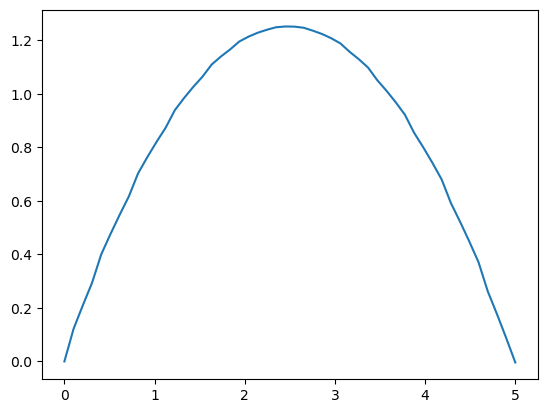

In [67]:
graph(x, helper(x))